# Problem Statement
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents.

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.

Link for dataset: https://www.kaggle.com/bandiatindra/telecom-churn-prediction/data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
for col in df.columns:
    print(df[col].value_counts())
    print('--------------------')

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
--------------------
Male      3555
Female    3488
Name: gender, dtype: int64
--------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
--------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
--------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetServ

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Text(0.5, 1.0, 'Distribution of Target Variable')

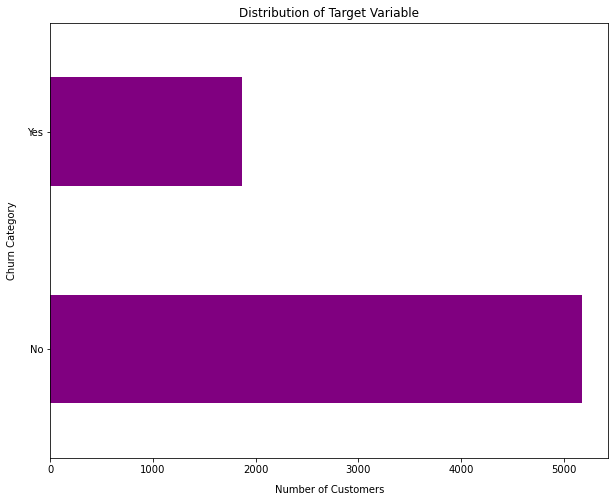

In [11]:
df.Churn.value_counts().plot(kind='barh', figsize=(10,8), color='purple')
plt.xlabel('Number of Customers', labelpad=10)
plt.ylabel('Churn Category', labelpad=10)
plt.title('Distribution of Target Variable')

In [12]:
#Target Class 
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

So the taget variable is highly imbalanced. So we need to address
this by applying upsampling or downsampling to the Target Variable.

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df_copy = df.copy()

In [15]:
#Variable Total charges should be a numeric so covert them into numeric.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [16]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

So there are 11 nan values in the converted column. Since the number of nan values are less we can either drop those rows are it can be transformed with median or mean value of TotalCharges column. 

In [17]:
df.dropna(how='any', inplace=True)

C:\Users\prabh\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


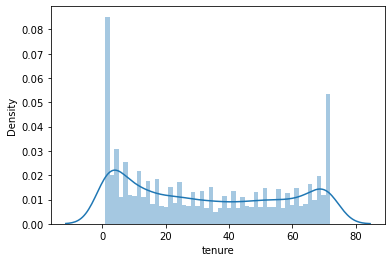

In [18]:
#Checking the distribution of the Churn Class amongst Tenure of the customers.
sns.distplot(df.tenure, bins=50);

To make it more meaningful, we can segregate the tenure into different classes. Since the max tenure is around 70 months, we can 
divide the tenure into yearly classes and assign the respective tenures in each yearly bins. 

In [19]:
df.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [20]:
tenure_years = ["{0} - {1}".format(i,i+11) for i in range(df.tenure.min(), df.tenure.max(), 12)]

In [21]:
tenure_years

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [22]:
#Applying pandas cut function to make the tenure into respective bins. 
df['tenure_years'] = pd.cut(df.tenure, range(1, 75,12), right=False, labels=tenure_years)

In [23]:
df.tenure_years.nunique()

6

In [24]:
df.tenure_years.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_years, dtype: int64

In [25]:
#The variable column tenure is not required now, since it got transformed into tenure_years. Also
#the customer id is not required, because it does not have any value in the prediction. 
df.drop(columns=['tenure', 'customerID'], axis=1, inplace=True)

In [26]:
df.Churn = np.where(df.Churn == 'Yes', 1, 0)

# Univariate Analysis - to check the churn class impact on its numbers. 

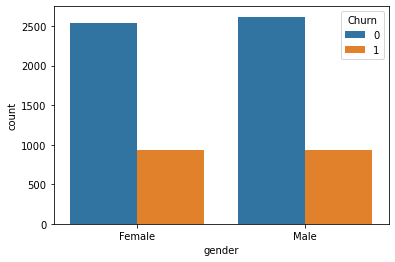

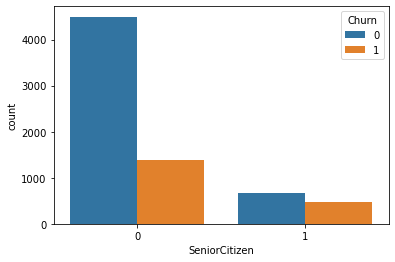

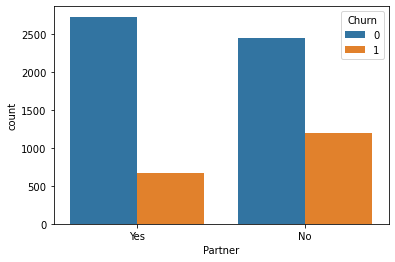

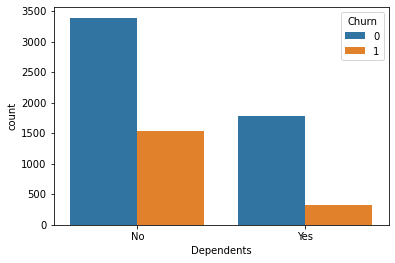

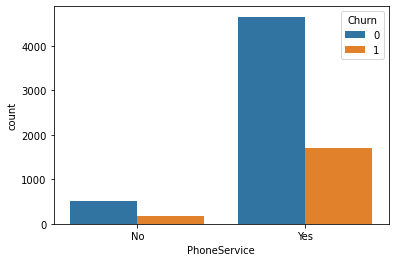

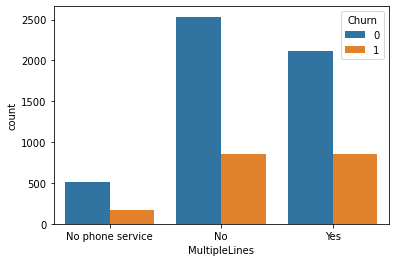

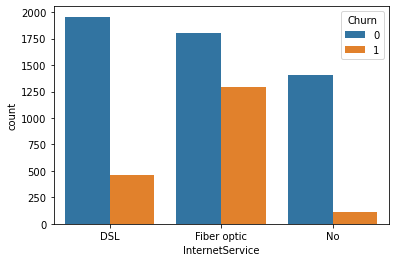

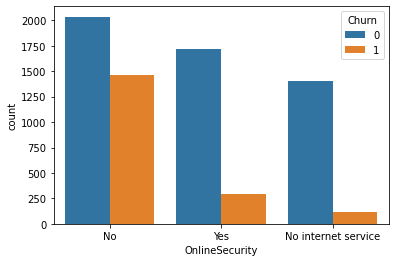

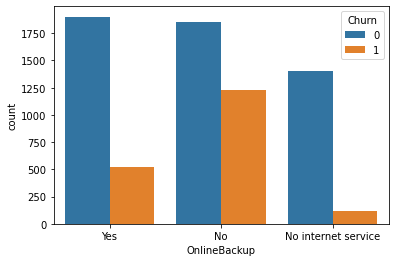

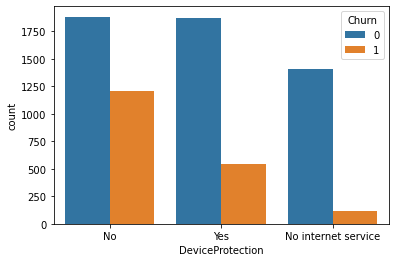

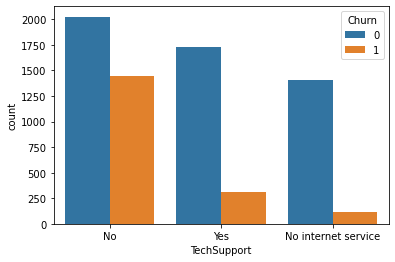

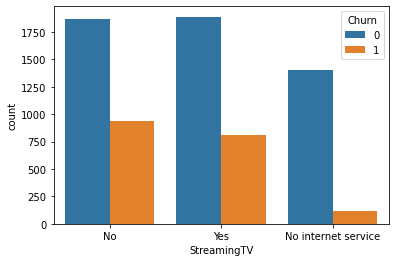

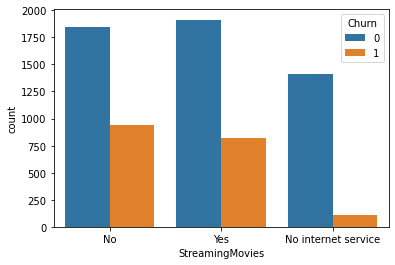

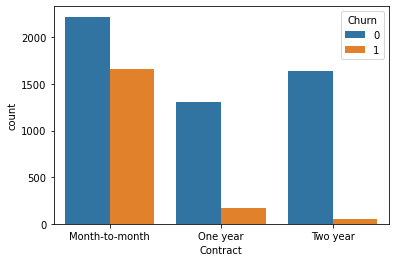

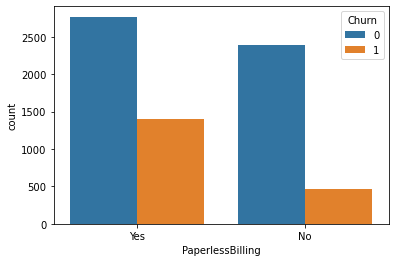

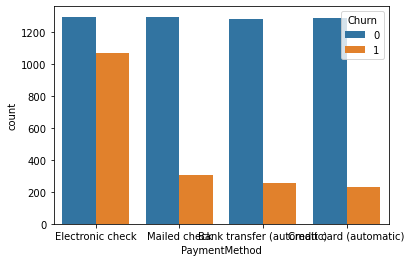

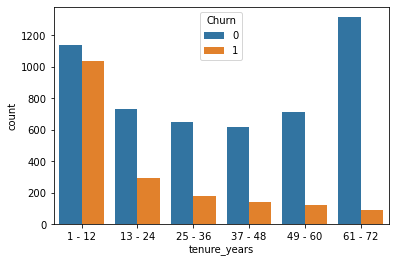

In [27]:
for i, colname in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=colname, hue='Churn')
    #print(colname)

### Insights:
1. Comparing to Aged customers, it appears that younger people are likely to be churners.
2. People without Partners and Dependents are likely to get churned. 
3. Customers with Phoneservice like to get churned.
4. Customers with Fiber Optic internet service are more likely to get churned. 
5. If the service provide does not have the value added services like OnlineSecurity, OnlineBackup, 
   DeviceProtection and TechSupport, then more likely the customers may get churned to other service providers. 
6. Customers with Month to Month Contract, Electonic Cheque payments method and with tenure less than a year are more likely to 
   be the churners. 

# Now checking the Churned customers based on gender to get more insights. 

In [28]:
df_churn = df[df.Churn == 1]

In [29]:
df_churn.shape, df_churn.columns

((1869, 20),
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
        'TotalCharges', 'Churn', 'tenure_years'],
       dtype='object'))

Performing a Univariate analysis on the churned df, it becomes
the bivariate analysis. 

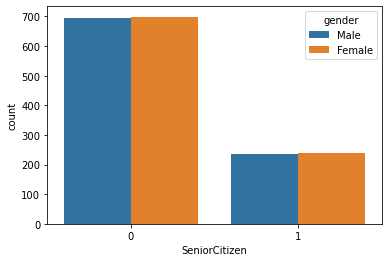

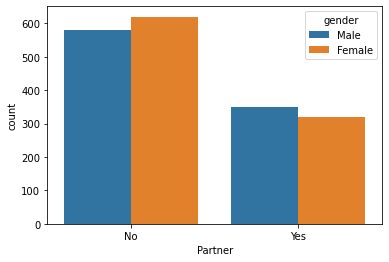

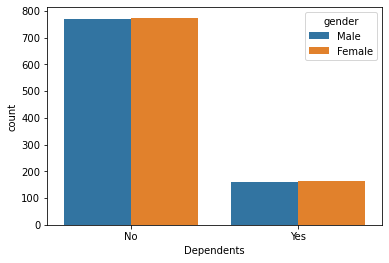

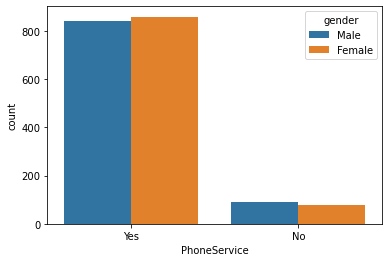

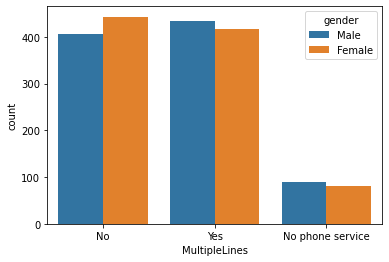

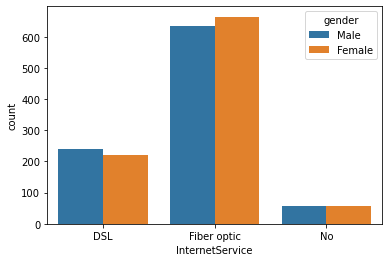

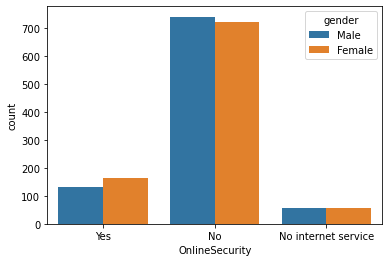

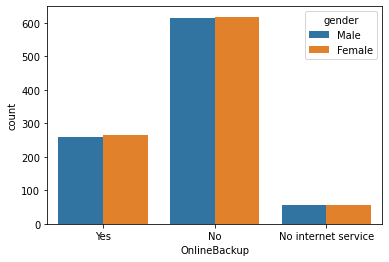

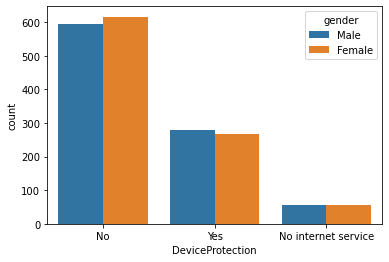

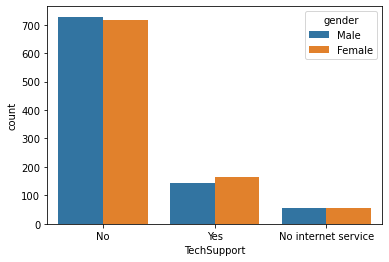

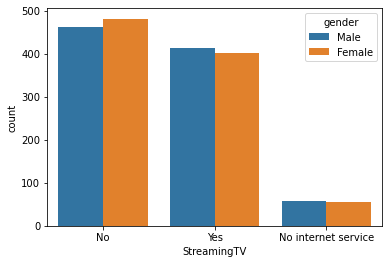

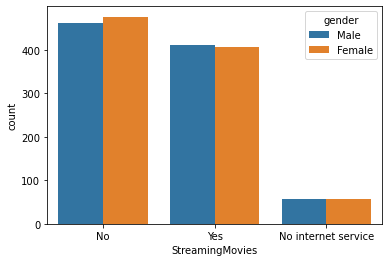

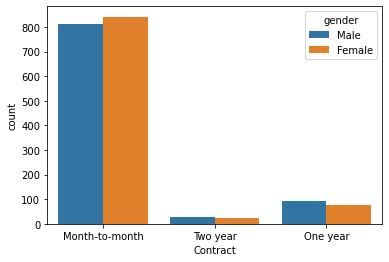

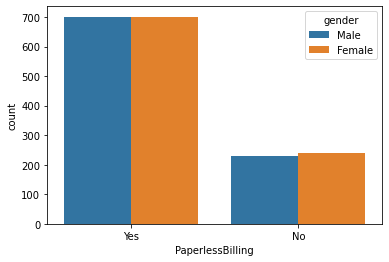

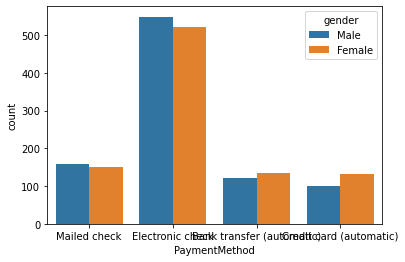

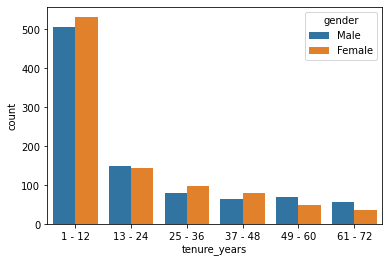

In [30]:
for i, colname in enumerate(df_churn.drop(columns=['gender', 'Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_churn, x=colname, hue='gender')
    #print(colname)

### Insights from Bivariate Analysis:
In Comparison to the Male Customers, Female customers are more likely to get churned. 
So, the service provider needs to bring more offers which attracts the Female Customers. 

In [31]:
df_dummy = pd.get_dummies(df)
df_dummy_cp = pd.get_dummies(df, drop_first=True)

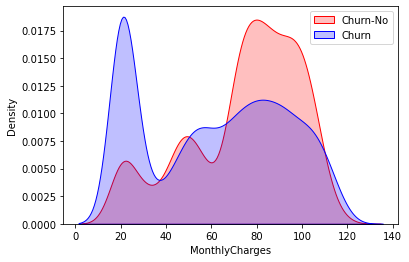

In [32]:
#Checking the Churn rate based on Monthly and Total Charges

sns.kdeplot(df.MonthlyCharges[df.Churn==1], color='Red', shade = True)
sns.kdeplot(df.MonthlyCharges[df.Churn==0], color='blue', shade=True)
plt.legend(['Churn-No', 'Churn'], loc='upper right')

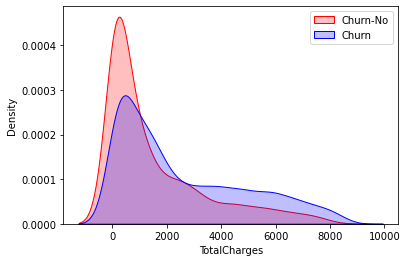

In [33]:
sns.kdeplot(df.TotalCharges[df.Churn== 1], color='Red', shade = True)
sns.kdeplot(df.TotalCharges[df.Churn== 0], color='blue', shade=True)
plt.legend(['Churn-No', 'Churn'], loc='upper right')

In [34]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_years'],
      dtype='object')

<AxesSubplot:>

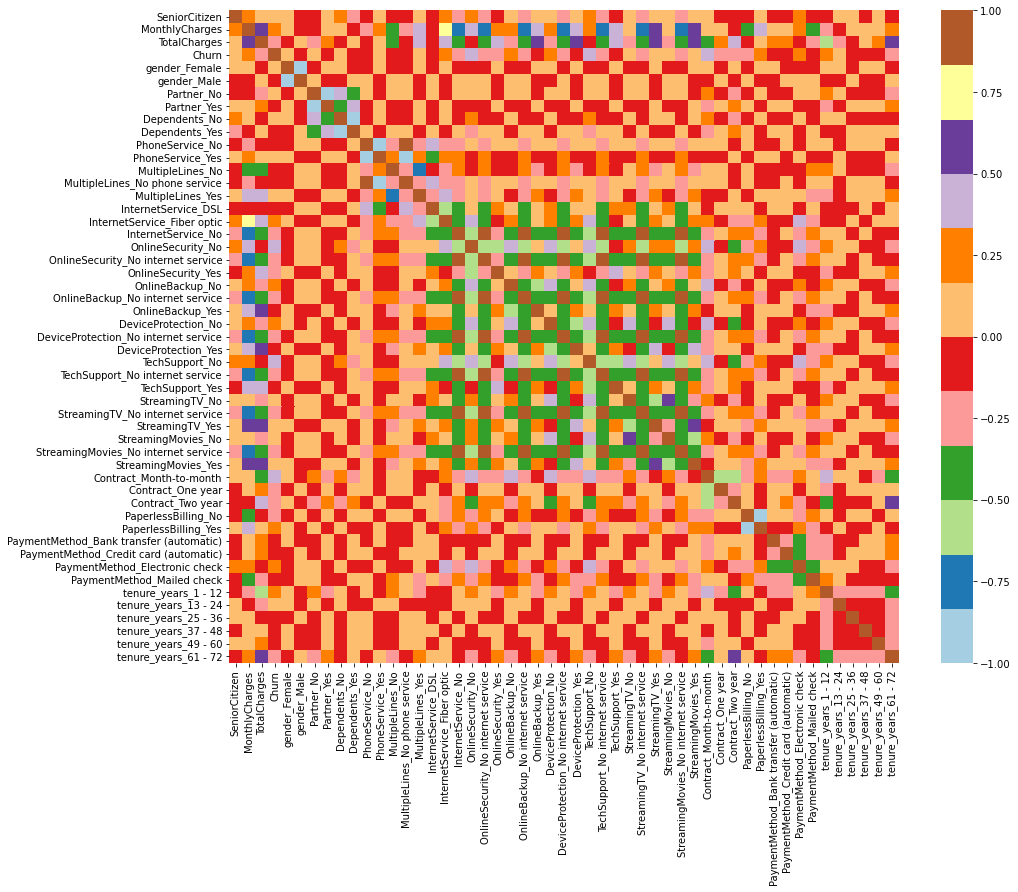

In [35]:
plt.figure(figsize=(15,12))
sns.heatmap(df_dummy.corr(), cmap='Paired')

### Overall insights from EDA. 

#### 1. The Company needs to bring offers which attracts more youngsters. 
      -- Comparing to Aged customers, it appears that younger people are likely to be churners.
#### 2. Need to workout a methodology to offer Internet facility.
      -- Customers with Fiber Optic internet service are more likely to get churned.
#### 3. Bring more value added services to retain the Custormers .
      --  If the service provide does not have the value added services like OnlineSecurity, OnlineBackup, DeviceProtection 
          and TechSupport, then more likely the customers may get churned to other service providers.
#### 4. Concentrate more on bringing value to the money paid by customers. 
      --  Customers with Month to Month Contract, Electonic Cheque payments method and with tenure less than a year are 
          more likely to be the churners.
#### 5. Bring more offers which attracts more Female customers. 
      --  In Comparison to the Male Customers, Female customers are more likely to get churned. So, the service provider 
          needs to bring more offers which attracts the Female Customers.

# Model Building



Building some of the famous classification models. 

In [36]:
#Importing required libraries:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN

In [37]:
df_dummy_cp.columns
X = df_dummy_cp.drop('Churn', axis=1)
y = df_dummy_cp.Churn

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=34)

### DecisionTree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, random_state=34)

In [40]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=34)

In [41]:
model_dt.score(X_train, y_train)

0.8442666666666667

In [42]:
pred_dt = model_dt.predict(X_test)

In [43]:
model_dt.score(X_test, y_test)

0.7803837953091685

In [44]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1040
           1       0.59      0.53      0.56       367

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [45]:
print(metrics.confusion_matrix(y_test, pred_dt))

[[902 138]
 [171 196]]


### The accuracy of prediction in the Churned category is very poor because of the imbalance in the data set. 
### To overcome this, a method called SMOTEENN is used from the imblearn to upsample the minority class in the target variable data. 

# SMOTEENN : Over-sampling using SMOTE and cleaning using ENN. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.

In [46]:
smn = SMOTEENN()
X_rsample, y_rsample = smn.fit_resample(X,y)

In [47]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_rsample, y_rsample, test_size = 0.2, random_state=34)

In [48]:
model_dt_sm = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10, random_state=34)

In [49]:
model_dt_sm.fit(Xr_train, yr_train)
pred_dt_sm = model_dt_sm.predict(Xr_test)
model_dt_sm.score(Xr_test, yr_test)

0.9205807002561913

In [50]:
#The accuracy has improved a lot after resampling it. Checking the classification report:
print(classification_report(yr_test, pred_dt_sm))


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       516
           1       0.91      0.95      0.93       655

    accuracy                           0.92      1171
   macro avg       0.92      0.92      0.92      1171
weighted avg       0.92      0.92      0.92      1171



In [51]:
#The accuracy in the churned class has improved drastically. 

In [52]:
print(metrics.confusion_matrix(yr_test, pred_dt_sm))

[[453  63]
 [ 30 625]]


The accuracy has improved a lot. 

### Building a RandomForest Classifier to check the accuracy in prediction:

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model_rf = RandomForestClassifier(n_estimators=50, criterion='gini', 
                                 max_depth=10, min_samples_leaf=10, random_state=34)

In [55]:
model_rf.fit(X_train, y_train)
model_rf.score(X_train, y_train)

0.8259555555555556

In [56]:
#The accuracy in RandomForest model training set itself lesser than DT. 

In [57]:
pred_rf = model_rf.predict(X_test)

In [58]:
model_rf.score(X_test, y_test)

0.7889125799573561

In [59]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1040
           1       0.64      0.43      0.52       367

    accuracy                           0.79      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.79      0.77      1407



The accuracy in churned prediction is also very poor. So applying the model into
SMOTEENN resampled data. 

In [60]:
smn = SMOTEENN()
X_rsample, y_rsample = smn.fit_resample(X,y)

In [61]:
model_rf_sm = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=10,
                                    min_samples_leaf=10, random_state=34)

In [62]:
model_rf_sm.fit(Xr_train, yr_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       random_state=34)

In [63]:
model_rf_sm.score(Xr_train, yr_train)

0.9504379406109805

In [64]:
pred_rf_sm = model_rf_sm.predict(Xr_test)

In [65]:
model_rf_sm.score(Xr_test, yr_test)

0.9265584970111016

In [66]:
print(metrics.classification_report(yr_test, pred_rf_sm))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       516
           1       0.91      0.96      0.94       655

    accuracy                           0.93      1171
   macro avg       0.93      0.92      0.92      1171
weighted avg       0.93      0.93      0.93      1171



In [67]:
#The accuracy score in the churned category has improved a lot. 
print(metrics.confusion_matrix(yr_test, pred_rf_sm))

[[453  63]
 [ 23 632]]


### The prediction accuracy is good, and the number of false samples has come down.  

### And the model performance is same as DecisionTree. 